In [259]:
# imports some tools you will use

# numpy the matrix multiplication and basic mathematics package
import numpy as np

# matplotlib - this is the most common plotting library 
import matplotlib.pyplot as plt

data = np.load("data.npy", allow_pickle=True).item() #,mmap_mode=None, allow_pickle=True, fix_imports=True, encoding='bytes')


\begin{equation}
C = \varepsilon \cdot \frac{A}{l} 
\label{eq:eq1}
\end{equation}


where $A$ is the area of the plates and $l$ is the length  or the distance between the parallel plates. When the parallel plates are cylindrical area $A$, equation becomes 

\begin{equation}
C = \varepsilon \cdot \frac{\pi \cdot r^2}{l}
\label{eq:eq2}
\end{equation}

$r$, radius of the cylindarical plate, is given as 50 μm and $l$, the length or thickness of the cylindarical plate, is given as 20 nm. Capacitance values are recorded in data file. To find the Dielectric Permittivity, $\varepsilon$, equation becomes:

\begin{equation}
\varepsilon = {C} \cdot \frac{l}{\pi \cdot r^2}
\label{eq:eq3}
\end{equation}

Additionally, Permittivity, $\varepsilon$ is the ratio between $\varepsilon_{0}$, permittivity of vacuum, and $\varepsilon_{r}$, relative permittivity, given as following

\begin{equation}
\varepsilon = \varepsilon_{0} \times \varepsilon_{r}
\label{eq:eq4}
\end{equation}

At last, dielectric constant or relative permittivity, $\varepsilon$ is found as following

\begin{equation}
\varepsilon_{r} = \frac{C}{\varepsilon_{0}}  \frac{l}{\pi \cdot r^2}
\label{eq:eq5}
\end{equation}

In [260]:
constant = np.pi*50*(10**(-6))*50*(10**(-6))/(200*(10**(-9)))*8.854 #i removed the 10^-12 term just because permittivity values cant be that high. 
#Additionally Capacitance values might be in pF rather F values.

In [261]:
import array as arr
import numpy as np
import numpy.matlib
import pandas as pd


#es111 = arr.array("d",)
#es11 = np.array([])
es11 = np.empty((0,100), float)
es22 = np.empty((0,100), float)
es33 = np.empty((0,100), float)
#es11 = np.matlib.empty((50,100))

i=0
while i<50:
    j=0
    es1 = []
    while j<100:
        #print(data["sample_1"][0][j])
        es1.append(float(data["sample_1"][i][j])/constant)
        j+=1
    es11 = np.append(es11, np.array([es1]), axis=0)
    i+=1
    
    

k=0
while k<50:
    j=0
    es2 = []
    while j<100:
        #print(data["sample_1"][0][j])
        es2.append(float(data["sample_2"][k][j])/constant)
        j+=1
    es22 = np.append(es22, np.array([es2]), axis=0)
    k+=1
    


l=0
while l<50:
    j=0
    es3 = []
    while j<100:
        #print(data["sample_1"][0][j])
        es3.append(float(data["sample_3"][l][j])/constant)
        j+=1
    es33 = np.append(es33, np.array([es3]), axis=0)
    l+=1


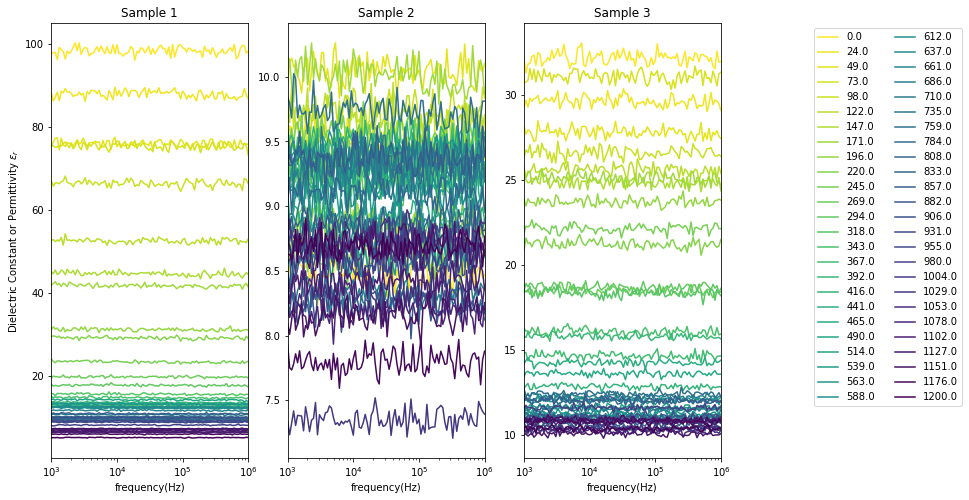

In [262]:
import matplotlib.pyplot as plt
import numpy as np

fig1 = fig, axs = plt.subplots(1, 3, figsize=(12,8)) #Creating three subplots with given sizes

color = np.flipud(plt.cm.viridis(np.linspace(0,1,50))) #color change function for each plot in same subplot since we have 50 different voltages applied to the material.
#linspaced function create an array with 50 number and viridis function holds. Flipping function might be necessary due to plotting follows column like pattern(?)

# Add your code for your loop here. 
i=0
while i<50:
    axs[0].semilogx(data["ac_frequency"], es11[i], color=color[i])
    i+=1
axs[0].set_xlim(1000, 1000000)
#axs[0].set_ylim(-0.000009, 0.00002)
axs[0].set_title("Sample 1")
axs[0].set_xlabel('frequency(Hz)')
axs[0].set_ylabel('Dielectric Constant or Permittivity $\epsilon_{r}$')

j=0
while j<50:
    axs[1].semilogx(data["ac_frequency"], es22[j], color=color[j])
    j+=1
axs[1].set_title("Sample 2")
axs[1].set_xlim(1000, 1000000)
axs[1].set_xlabel('frequency(Hz)')
#axs[1].set_ylim(0.000008, 0.000014)

k=0
while k<50:
    axs[2].semilogx(data["ac_frequency"], es33[k], color=color[k])
    k+=1
axs[2].set_title("Sample 3")
axs[2].set_xlim(1000, 1000000)
axs[2].set_xlabel('frequency(Hz)')
#axs[2].set_ylim(0.0000005, 0.0000105)

chartBox = axs[2].get_position()

rv = np.rint(data["dc_voltage_vector"]) #rounded voltage values
axs[2].set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height]) #only first subplot area is given and same values are assigned for each element
axs[2].legend(rv ,loc='upper right', bbox_to_anchor=(2.25, 1), ncol=2)

#insert legend fuction here to show which of these colors indicates lower voltage or higher voltage in color gradient

In [263]:
#this equation is based on Rayleigh law. 
fr1 = np.empty((0,2), float) #fitresults1 for sample 1 
fr2 = np.empty((0,2), float) #fitresults2 for sample 2
fr3 = np.empty((0,2), float) #fitresults3 for sample 3 
i=0
while i<50: #i started to become more efficient since i managed to create more compact code.
    #a(i) = np.polyfit(data["ac_frequency"], es11[i],1)
    fr1 = np.append(fr1, [np.polyfit(data["ac_frequency"], es11[i],1)], axis=0)
    fr2 = np.append(fr2, [np.polyfit(data["ac_frequency"], es22[i],1)], axis=0)
    fr3 = np.append(fr3, [np.polyfit(data["ac_frequency"], es33[i],1)], axis=0)
    i+=1

In [264]:
i=0
fr11=[]
fr22=[]
fr33=[]
while i<50:
    fr11.append(fr1[i][1])
    fr22.append(fr2[i][1])
    fr33.append(fr3[i][1])
    i+=1
    #fr11 np.append(fr11, fr

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


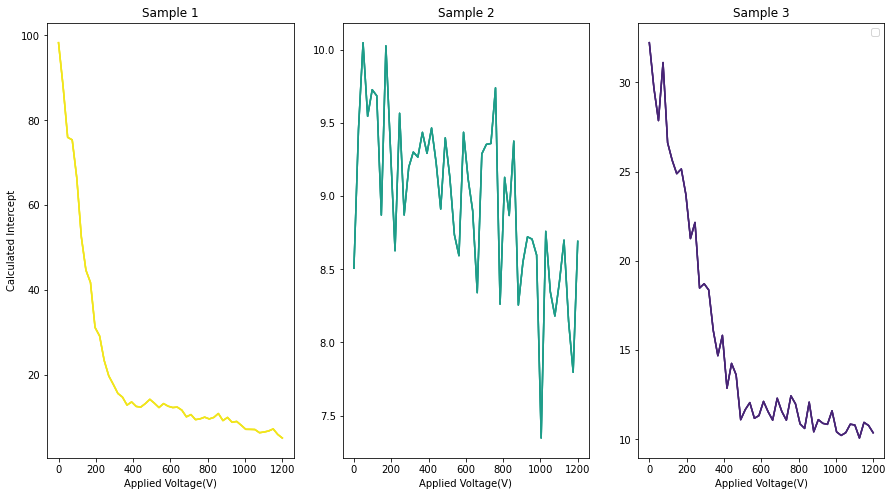

In [265]:
import matplotlib.pyplot as plt
i=0

fig2 = fig, axs = plt.subplots(1, 3, figsize=(15,8))

while i<3:
    axs[0].plot(data['dc_voltage_vector'], np.array(fr11), color=color[1])
    axs[1].plot(data['dc_voltage_vector'], np.array(fr22), color=color[22])
    axs[2].plot(data['dc_voltage_vector'], np.array(fr33), color=color[44])
    axs[i].set_title("Sample {}".format(i+1))
    axs[i].set_xlabel('Applied Voltage(V)')
    i+=1
axs[0].set_ylabel('Calculated Intercept')


chartBox = axs[2].get_position()
axs[2].set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height]) #only first subplot area is given and same values are assigned for each element
axs[2].legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1)

<Figure size 640x400 with 0 Axes>

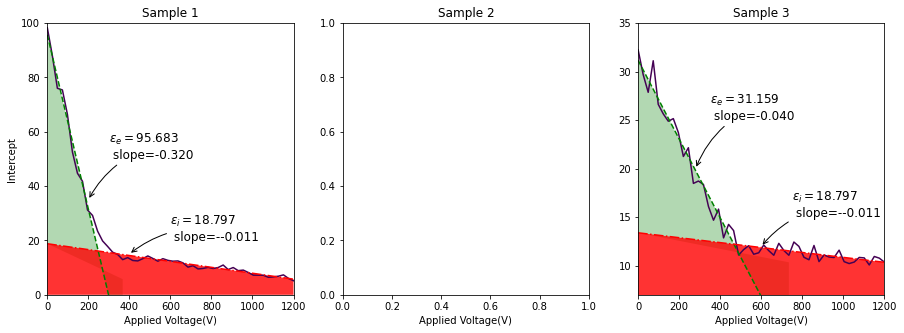

In [266]:
plt.figure(figsize=(8, 5), dpi=80)
fig, axs = plt.subplots(1, 3, figsize=(15,5))

idx = (data['dc_voltage_vector']>200)*(data['dc_voltage_vector']<400)
#1. If the plotting numbers were huge, it would be hard to do it manually but we have 3 plottings. Also linear regions are few in number.

nfr11 = np.polyfit(data["dc_voltage_vector"][:10],fr11[:10],1)  #for the first fitting operation for sample_1                          
nfr12 = np.polyfit(data["dc_voltage_vector"][19:], fr11[19:],1)  #for the second fitting operation for sample_1 
nfr21 = np.polyfit(data["dc_voltage_vector"][1:18],fr22[1:18],1)  #for the first fitting operation for sample_2                          
nfr22 = np.polyfit(data["dc_voltage_vector"][19:], fr22[19:],1)  #for the second fitting operation for sample_2  
nfr31 = np.polyfit(data["dc_voltage_vector"][:22],fr33[:22],1)  #for the first fitting operation for sample_3                         
nfr32 = np.polyfit(data["dc_voltage_vector"][25:], fr33[25:],1)  #for the second fitting operation for sample_3

nw11 =  np.linspace(0,data["dc_voltage_vector"][15],100) #just creating x points to sketch fitting lines
nw12 =  np.linspace(0,data["dc_voltage_vector"][49],100)
nw31 =  np.linspace(0,data["dc_voltage_vector"][30],100)
nw32 =  np.linspace(0,data["dc_voltage_vector"][49],100)
c11=[]
c12=[]
c31=[]
c32=[]
i=0

while i<100:
    c11.append(float(nfr11[0]*nw11[i]+nfr11[1])) #i used the slopes and intercepts that i get from nfr values.
    c12.append(float(nfr12[0]*nw12[i]+nfr12[1]))
    c31.append(float(nfr31[0]*nw31[i]+nfr31[1]))
    c32.append(float(nfr32[0]*nw32[i]+nfr32[1]))
    i+=1
    
#plot1
axs[0].plot(data['dc_voltage_vector'], np.array(fr11), color=color[49]) 
axs[0].plot(nw11,c11, "g--") #sketching lines with different color and type.
axs[0].plot(nw12,c12, "r-.")
axs[0].set_xlim(0, 1200)
axs[0].set_ylim(0, 100)
axs[0].fill_between(nw11, c11, c12, facecolor='green', alpha=0.3)
axs[0].fill_between(nw12, c12, facecolor='red', alpha=0.8)
#plot3
axs[2].plot(data['dc_voltage_vector'], np.array(fr33), color=color[49])
axs[2].plot(nw31,c31, "g--")
axs[2].plot(nw32,c32, "r-.")
axs[2].set_xlim(0, 1200)
axs[2].set_ylim(7 ,35)
axs[2].fill_between(nw31, c31, c32, facecolor='green', alpha=0.3)
axs[2].fill_between(nw32, c32, facecolor='red', alpha=0.8)
j=0
while j<3:
    axs[j].set_title("Sample {}".format(j+1)) #labeling operation
    axs[j].set_xlabel('Applied Voltage(V)')
    axs[0].set_ylabel("Intercept")
    j+=1
#figure 1 annotates
axs[0].annotate('$\epsilon_{e}=95.683$\n slope=-0.320', xy=(200, 35),  xycoords='data',
            xytext=(300, 50), textcoords='data', fontsize=12,
           arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),
            ) #extrinsic region
axs[0].annotate('$\epsilon_{i}=18.797$\n slope=--0.011', xy=(400, 15),  xycoords='data',
            xytext=(600, 20), textcoords='data', fontsize=12,
           arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),
            ) #intrinsic region
#figure 3 annotates
axs[2].annotate('$\epsilon_{e}=31.159$\n slope=-0.040', xy=(280, 20),  xycoords='data',
            xytext=(350, 25), textcoords='data', fontsize=12,
           arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),
            ) #extrinsic region
axs[2].annotate('$\epsilon_{i}=18.797$\n slope=--0.011', xy=(600, 12),  xycoords='data',
            xytext=(750, 15), textcoords='data', fontsize=12,
           arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),
            ) #intrinsic region
plt.savefig('q2.png', bbox_inches='tight', transparent = 'False', dpi=800)

In [267]:
nfr31[0]

-0.04057729199446259